# PCA : 주성분 분석 => 모델 전처리에 사용

상관계수행렬와 공분산행렬 => 고유값분해

변수간의 다중공선성이 있는지 확인해서 노이즈잡음제거 / 변수중요도를 알아보기 위해서 사용함

### 공분산 (covariance) : cov()
- 두변량이 각각의 평균으로부터 변화하는 방향 및 양에 대한 기대값
- 공분산이 +면 한변수값이 증가할때 다른변수값도 증가함

두변수의 단위에 의존하여 다른데이터와 비교시 불편 => 상관계수사용

### 상관계수 = 표준화된 공분산 (pearson correlation coefficient) : cor() 
- 공분산은 각변량의 단위에 의존(변동크기량 모호)
- 공분산을 각 변량의 표준편차로 나누어 표준화
양의 값이면 두변수가 같은 방향으로 움직임 / 음이면 반대 / 0이면 선형관계없음

출처: https://rfriend.tistory.com/126 [R, Python 분석과 프로그래밍의 친구 (by R Friend)]

## 고유값 분해 => 특징추출 (pandas 초기에 설명함??)
고유값과 고유벡터로 확인됨 ( 내적=0 일때는 정직교함 => 이미지로 볼것)

In [316]:

import numpy as np
rng = np.random.RandomState(10) #seed 값
C = rng.randn(3,3)# normal 3x3 행별
print(np.dot(C, C.T)) 
# T 전치행렬 , 행렬의 거듭제곱을 하기 위해서 전치행렬곱해줌
# 행렬 거듭제곱 = > 정방행렬, 대칭행렬 값이 나옴
print()


# 고유값 분해
e, V = np.linalg.eigh(np.dot(C, C.T))
print("eigenvector : 고유벡터", V)
print()
print("eigenvalue : 고유값", e)
## 3개의 벡터의 고유값

np.dot(V[1],V[2]) # 두벡터의 내적 => 0 에 가까움 : 직교한다

[[4.67300869 1.54608517 0.42456214]
 [1.54608517 0.9046519  0.0621289 ]
 [0.42456214 0.0621289  0.0822976 ]]

eigenvector : 고유벡터 [[-0.15797077 -0.30570231 -0.93893095]
 [ 0.20981122  0.9187662  -0.33443672]
 [ 0.9648961  -0.24982947 -0.08099843]]

eigenvalue : 고유값 [0.02629875 0.37332691 5.26033253]


-3.122502256758253e-17

# MDS 다차원척도법 => 시각화

데이터 @ 임의의 직교행렬
(50,10) @ (10,2) = (50,2) 변수들을 고려해서 2차원 시각화 => 재해석함

10변수를 10차원인데 시각화가 불가함 => 2차원으로 시각화 하기 위해 내적


In [317]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

# 이미지를 파일로 출력하고 로딩한 다음 글씨만 추출
def make_hello(N=1000, rseed=42):
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'Gina', va='center', ha='center', weight='bold', size=85)
    fig.savefig('Gina.png')
    plt.close(fig)   

    from matplotlib.image import imread
    data = imread('Gina.png')[::-1, :, 0].T   
    print("이미지차원", data.shape)
   
    print(data)
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    print("만든 갯수",X.shape)
    print((X * data.shape).shape)
    i, j = (X * data.shape).astype(int).T
   
    mask = (data[i, j] < 1)
    X = X[mask]
    print("새로운X갯수", X.shape)
    print("원래이미지의 차수 ", data.shape)
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]

    return X[np.argsort(X[:, 0])]

이미지차원 (288, 72)
[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
만든 갯수 (4000, 2)
(4000, 2)
새로운X갯수 (1018, 2)
원래이미지의 차수  (288, 72)


X 행렬의 모양 (1000, 2)


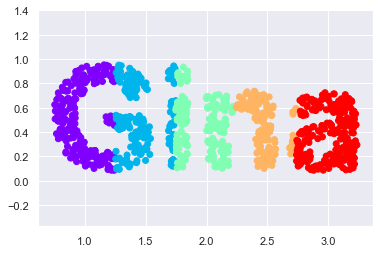

In [318]:
X=make_hello(1000)
colorize=dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow',5))

plt.scatter(X[:,0], X[:, 1], **colorize)
plt.axis('equal')





print()
print()

print( "X 행렬의 모양", X.shape)

#X=make_hello(1000)
#colorize=dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow',5))



<class 'list'>


(5.352513939672824, 8.10924352888782, 5.377109770990646, 6.818101387082652)

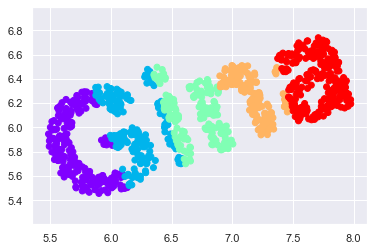

In [319]:

               # 사람이 표현하는 각도
def rotate(X, angle):
    theta = np.deg2rad(angle) # 라디안 컴퓨터가 인식할수 있게 변경 =>호의 길이
    R = [[np.cos(theta), np.sin(theta)], [-np.sin(theta), np.cos(theta)]]
    # 2차원 행렬회전 [x축으로 1, y축 0] , []
    
    print(type(R))
    return np.dot(X, R) # 1000x2 @ 2x2 = 1000x2 : 내적으로 행렬 회전시킴

# 20도 돌아감
X2 = rotate(X, 20) + 5 # 각도회전으로 글자 잘릴까봐 +5
plt.scatter(X2[:, 0], X2[:, 1], **colorize)
plt.axis('equal')

(1000, 1000)

[[0.         0.11693431 0.05154096 0.23898986 0.04501505]
 [0.11693431 0.         0.06562562 0.12219671 0.15936656]
 [0.05154096 0.06562562 0.         0.18749134 0.0939055 ]
 [0.23898986 0.12219671 0.18749134 0.         0.28045738]
 [0.04501505 0.15936656 0.0939055  0.28045738 0.        ]]


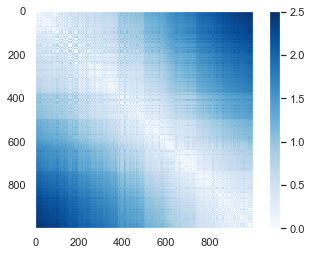

In [320]:
# 각 점들간의 상호거리
from sklearn.metrics import pairwise_distances 
                     # 디폴트 -유클리디안 거리:피타고라스의 정리
    
    
    # 재밌게 1000차원으로 ~~~~
    # 새로운거 한번 만들어보자 ~~
    
    
    
    
D = pairwise_distances(X) #거리행렬
print(D.shape) # 1000x1000 정방행렬 이면서 대칭행렬 (행과 열에 똑같은 변수)
print()

print(D[:5, :5])

plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar()

In [321]:
D2 = pairwise_distances(X2) #X2 = 1000x2 행렬
np.allclose(D,D2)
#원형을 유지하고 있음

True

[[-0.38290043 -1.17369226]
 [-0.48207424 -1.12236496]
 [-0.42455227 -1.14781659]
 ...
 [ 0.53946009  1.12819575]
 [ 0.54119489  1.12984705]
 [ 0.39446393  1.20839566]]


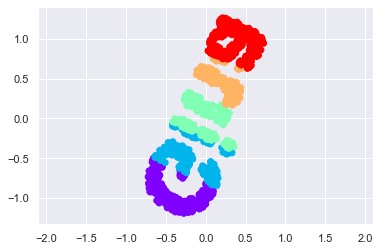

In [322]:
# 다형체  manifold
from sklearn.manifold import MDS
model = MDS(n_components=2, dissimilarity='precomputed', random_state=1) # MDS 1000차원 => 2차원으로 축소
# dissimilarity='precomputed 미리 계산 되어진 거리행렬 이용해 차원축소함

out = model.fit_transform(D) # 모델에 D 값
plt.scatter(out[:,0], out[:,1], **colorize)
plt.axis('equal')
print(out)


In [63]:
# 2차원 -> 3차원으로 변환
# MDS 는 분석용으로 못씀 = random 이라 시각화로만 씀

print(" 데이터의 차원은", X.shape)
print(X.shape[1])
print()

def random_projection(X, dimension=3, rseed=42):      # 3 차원 만들어라
    assert dimension >= X.shape[1] 
    # assert 확인해라 :  2차원인 경우 행,열로 출력 => 차원확대만 가능
    
    rng = np.random.RandomState(rseed)
    C = rng.randn(dimension, dimension) #(3x3) 
    print("C는 ", C.shape)
    print(np.dot(C, C.T)) #행렬의 거듭제곱 => 정방행렬, 대칭행렬 만듦
    
    e, V = np.linalg.eigh(np.dot(C, C.T)) #고유값분해 -> 고유벡터는 정직교
    print("V는 ", V.shape) #(3x3)
    
    print("차원은", V[:X.shape[1]]) # 원래 데이터 2차원 =(2x3)
    return np.dot(X, V[:X.shape[1]]) # (1000x2)@(2,3) =(3x2) 변환



X3=random_projection(X,3)
X3.shape

 데이터의 차원은 (1000, 2)
2

C는  (3, 3)
[[0.68534241 0.63723771 0.37423535]
 [0.63723771 2.42926786 2.33541214]
 [0.37423535 2.33541214 3.30327538]]
V는  (3, 3)
차원은 [[-0.63360361  0.75939282  0.14788172]
 [ 0.64803399  0.41652241  0.63762139]]


(1000, 3)

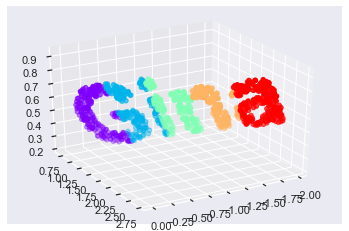

In [40]:

from  mpl_toolkits import mplot3d

ax = plt.axes(projection = '3d')
ax.scatter3D(X3[:, 0], X3[:, 1], X3[:,2], **colorize)
ax.view_init(azim=60, elev=30) 
            # azim 좌우 elev 위아래 = 3차원에서 보는 카메라의 각도

(-0.8049335446171639,
 0.8084769562019949,
 -1.3289013148724105,
 1.3996402849294194)

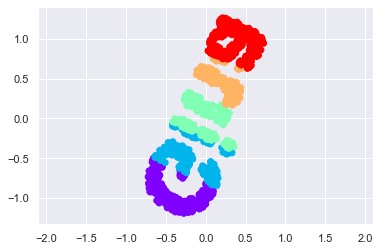

In [64]:
model = MDS(n_components=2, random_state=1)
out3 = model.fit_transform(X3)
plt.scatter(out3[:, 0], out3[:, 1], **colorize)
plt.axis('equal')

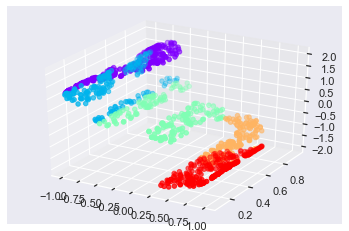

In [66]:

def make_hello_s_curve(X):
    t = (X[:, 0] -2) * 0.75 * np.pi
    x = np.sin(t)
    y =X[:, 1]
    z = np.sign(t) * (np.cos(t) -1 ) #sign = + -
    return np.vstack((x,y,z)).T

XS=make_hello_s_curve(X)
ax =plt.axes(projection='3d')
ax.scatter3D(XS[:, 0], XS[:, 1], XS[:, 2], **colorize)

# MDS는 비선형에 취약, 선형에는 강하지만

(-1.371432172721429, 1.3205083272008673, -2.020904569455589, 2.066823029855024)

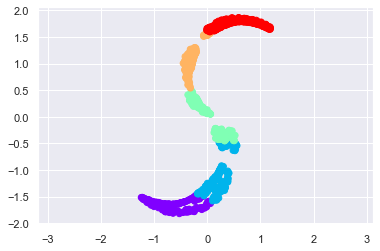

In [67]:
# MDS는 비선형에서 모양유지가 안됨

model = MDS(n_components=2, random_state=1)
out3 = model.fit_transform(XS)
plt.scatter(out3[:, 0], out3[:, 1], **colorize)
plt.axis('equal')

# LLE(locally linear embedding)
- 비선형에 강함
- 가까이 있는 (n_neighbors) 요소를 확인하고 (n_components) 차원으로 축소 

(0.15, -0.15)

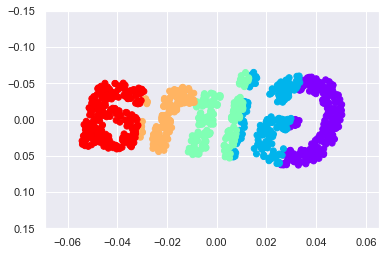

In [69]:
from sklearn.manifold import LocallyLinearEmbedding
model = LocallyLinearEmbedding(n_neighbors=100, n_components =2,
                              method='modified', eigen_solver='dense')

out = model.fit_transform(XS)
fig,ax =plt.subplots()
ax.scatter(out[:,0], out[:,1], **colorize)
ax.set_ylim(0.15, -0.15)




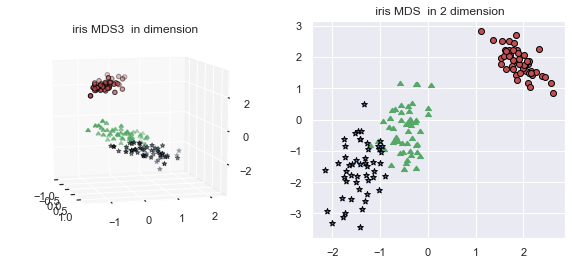

In [89]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt # 출력준비
from sklearn import manifold # 다형체 명령 maniifold.MDS 호출됨
from sklearn.manifold import MDS #편하게 호출하게 import

from matplotlib import pylab
from mpl_toolkits import mplot3d # 3차원 출력
import os # 디렉토리 관리
import numpy as np

CHART_DIR ="./" # 디렉토리 변수를 넣어서???
colors = ['r', 'g', 'b'] # 데이터 칼러 팔레트
markers = ['o', 6, '*']

def plot_iris_mds():
    iris = load_iris()
    X = iris.data
    y = iris.target
    fig = pylab.figure(figsize=(10, 4))
    ax = fig.add_subplot(121, projection='3d')
    
    ax.set_facecolor('white') # 바탕색
    
    # 1번째 3d 그래프
    
    mds = manifold.MDS(n_components=3) # 변수 4개 => 3차원으로 시각화해라 => 2차원
    Xtrans = mds.fit_transform(X)
    # 직교하는 축 계산해서 fit => 변환시켜줌 #(150x3)
    
                                 # y값 3개
    for cl, color, marker in zip(np.unique(y), colors, markers):
        ax.scatter(
            Xtrans[y == cl][:, 0], Xtrans[y == cl][:, 1], Xtrans[y == cl][:, 2],  # 3차원이니까 3개로 줘야함
            c=color, marker=marker, edgecolor='black')
        
    pylab.title(" iris MDS3  in dimension")
    ax.view_init(10, -15) # 카메라 각도 조절
    
    #2번째 그래프

    mds = manifold.MDS(n_components=2) # 2차원으로 시각화
    Xtrans = mds.fit_transform(X)

    ax = fig.add_subplot(122)
    for cl, color, marker in zip(np.unique(y), colors, markers):
        ax.scatter(
            Xtrans[y == cl][:, 0], Xtrans[y == cl][:, 1], c=color, 
            marker=marker, edgecolor='black')
    pylab.title(" iris MDS  in 2 dimension")

    filename = "mds_demo_iris.png"
    pylab.savefig(os.path.join(CHART_DIR, filename), bbox_inches="tight") 

plot_iris_mds()

# Kmeans : 군집분석 => 

- 종속변수 결정
- 압축 : 팔레트, 실제데이터 : 팔레트 번호 (256) 1바이트로 표현가능
- 원형이상치 제거
- 챗봇이 미리 군집화해서 문제 해결에 도움을 줌

# 알고리즘 - k값을 결정( 군집수결정), 중심값 결정 => 중심값 재계산 : 변화

- 문제점 : 이상치에 민감하다

# k-means 의 척도 : 거리값( 피타고라스의 정리 -> euclidian distance)



kmeans 문제점 극복 - > DBSCAN : eps 기본거리값, 최소요소수
- 이웃 근거리값끼리 군집을 이어감 (중심점이 아니라) - 자동분류(핵심값, 경계값, 어느 군집에도 속하지 않는 것)

In [98]:
import scipy
import sklearn.metrics.pairwise

a_64 = np.array([61.22, 71.60, -65.755], dtype=np.float64)
b_64 = np.array([61.22, 71.608, -65.72], dtype=np.float64)
a_32 = a_64.astype(np.float32)
b_32 = b_64.astype(np.float32)
#nomr 원점으로 부터의 크기 (단일벡터) => 단일벡터 - 단일벡터
dist_64_np = np.array([np.linalg.norm(a_64 - b_64)], dtype=np.float64)
dist_43_np = np.array([np.linalg.norm(a_32 - b_32)], dtype=np.float32)

# 두개의 벡터간의 거리값을 재기위한 함수()
# 유클리디안 거리값 => 특성간 가까운 거리인지 먼거리인지 구별하기위해서 
dist_64_sklearn = sklearn.metrics.pairwise.pairwise_distances([a_64],[b_32], metric="manhattan") # manhattan 거리: 수평수직

from sklearn.metrics.pairwise import euclidean_distances 

In [114]:
from sklearn.svm import SVC #분류
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler # 전처리 => kmeans, PCA 는 민감함 = 꼭 전처리 해줘야함

cancer=load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

# 데이터를 가져와서 훈련용/테스트용 셋트 만들고

#전처리 => 정규화
scaler = MinMaxScaler().fit(X_train) # 함수연결. chaining => 훈련용데이터를 정규화 해서 확인
X_train_scaled = scaler.transform(X_train) # 0~1 사이의 범위로




svm = SVC() #분류기에 fitting
svm.fit(X_train_scaled, y_train)

X_test_scaled = scaler.transform(X_test) # 테스트 데이터에 변환
print("테스트 점수 : {:2f}".format(svm.score(X_test_scaled, y_test))) # score =predict 예측 완료

print()

from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], #6개의 변수
             'gamma': [0.001, 0.01, 0.1, 1, 10, 100]} # 6개의 변수 => 6x6 =36 조합 


grid=GridSearchCV(SVC(), param_grid=param_grid, cv=5) #교차검증 5번으로 나눠서  GridSearchCV
grid.fit(X_train_scaled, y_train)
# 최상의 조합 뽑아냄!!

print("최상의 교차 검증 정확도: {:2f}".format(grid.best_score_))
print("테스트 점수: {:2f}".format(grid.score(X_test_scaled, y_test)))
print("최적의 매개변수:", grid.best_params_)

C:\Users\ICT01_02\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


테스트 점수 : 0.951049

최상의 교차 검증 정확도: 0.981221
테스트 점수: 0.972028
최적의 매개변수: {'C': 1, 'gamma': 1}


# 파이프라인으로 한셋트 묶기

In [113]:
# 참조 : 설명=> parameter 전달
from sklearn.pipeline import Pipeline

pipe=Pipeline([("scaler", MinMaxScaler()), ("svm", SVC())])
pipe.fit(X_train, y_train)
print("테스트 점수: {:.2f}".format(pipe.score(X_test, y_test)))
print()

# pipe line 이용해서 => 다음 parameter 도 이름 변경해줘야함
# pipe line + GridSearchCV 다양한 테스트 문제를 해결
from sklearn.model_selection import GridSearchCV

# C = regularization 규제 : 과적합 방지하기 위해 => 범위는 일단 처음에 대충 ~ 크게 줌
param_grid = {'svm__C': [0.001, 0.01, 0.1, 1, 10, 100], 
             'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]} 


grid=GridSearchCV(pipe, param_grid=param_grid, cv=5) 
grid.fit(X_train_scaled, y_train)

print("최상의 교차 검증 정확도: {:2f}".format(grid.best_score_))
print("테스트 점수: {:2f}".format(grid.score(X_test_scaled, y_test)))
print("최적의 매개변수:", grid.best_params_)

C:\Users\ICT01_02\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


테스트 점수: 0.95
최상의 교차 검증 정확도: 0.981221
테스트 점수: 0.972028
최적의 매개변수: {'svm__C': 1, 'svm__gamma': 1}


# cluster = K-means 비지도학습

- 초기 중심값이 결정 입력 => 중심을 지속적으로 변화
- 중심과의 거리값이 중요합

2개 cluster 중심값 [[6.61044776 2.96567164]
 [5.22409639 3.1313253 ]]

3개 cluster 중심값 [[6.81276596 3.07446809]
 [5.006      3.428     ]
 [5.77358491 2.69245283]]

3개 cluster중심값 [[6.91025641 3.08717949]
 [4.76666667 2.89166667]
 [5.1875     3.6375    ]
 [5.93818182 2.77090909]]


Text(0.5, 1.0, 'K=4, J=37.05')

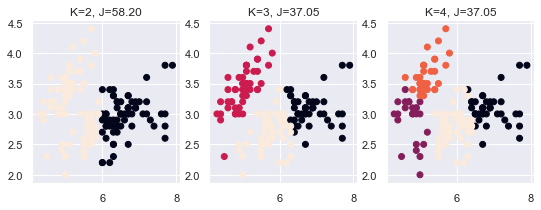

In [128]:
from sklearn import cluster, datasets
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

iris =datasets.load_iris()
X=iris.data[:, :2] # 변수는 4개지만 => 2 개만 뽑아서 쓰고 있음
y_iris=iris.target

km2 = cluster.KMeans(n_clusters=2).fit(X)
km3 = cluster.KMeans(n_clusters=3).fit(X)
km4 = cluster.KMeans(n_clusters=4).fit(X)


plt.figure(figsize=(9,3)); plt.subplot(131)
plt.scatter(X[:,0], X[:,1], c=km2.labels_) # 컬러 2 => kmeans를 한 결과 2개로 cluster 
print("2개 cluster 중심값",km2.cluster_centers_)
plt.title("K=2, J=%.2f" % km2.inertia_) # 군집 내부거리 값
print()
plt.subplot(132)
plt.scatter(X[:,0], X[:,1], c=km3.labels_) # labels => 군집번호 : 종속변수
print("3개 cluster 중심값",km3.cluster_centers_)
plt.title("K=3, J=%.2f" % km3.inertia_)
print()
plt.subplot(133)
plt.scatter(X[:,0], X[:,1], c=km4.labels_)
print("3개 cluster중심값",km4.cluster_centers_)
plt.title("K=4, J=%.2f" % km3.inertia_)

# iris 군집 cluster 갯수를 조정해서 종속변수 결정

[[7 5]
 [5 7]
 [7 7]
 [4 4]
 [4 6]
 [1 4]
 [0 0]
 [2 2]
 [8 7]
 [6 8]
 [5 5]
 [3 7]]


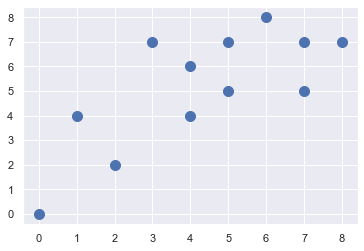

In [135]:
X=np.array([[7,5], [5,7], [7,7], [4,4], [4,6], [1,4],
           [0,0], [2,2], [8,7],[6,8],[5,5],[3,7]]) # (12x2)
print(X)
plt.scatter(X[:,0], X[:,1], s=100)
plt.show()

12



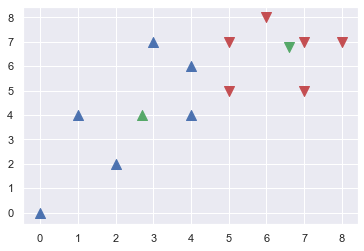

In [152]:
from sklearn.cluster import KMeans
# 레이블: 군집번호 => 종속변수 : 12개의 데이터 => 12개의 값

model =KMeans(n_clusters=2, init="random", n_init=1, max_iter=1,
             random_state=1).fit(X)

c0, c1 = model.cluster_centers_ #중심점 2개의 cluster
print(len(model.labels_))


print()
# boolean index =>
# 색과 마커모양을 다르게 주기 위햇 == 값에 대해 True/False
plt.scatter(X[model.labels_==0,0], X[model.labels_==0,1], s=100,
           marker='v', c='r')
plt.scatter(X[model.labels_==1,0], X[model.labels_==1,1], s=100,
           marker='^', c='b')
plt.scatter(c0[0], c0[1], s=100, c='g', marker='v') # 중심점 
plt.scatter(c1[0], c1[1], s=100, c='g', marker='^') # 중심점 
plt.show()

# kmeans 장점 : 압축 => 이미지 컬러로 응용

In [184]:
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time
from matplotlib import font_manager, rc

font_name= font_manager.FontProperties(
fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

n_colors=64
china = load_sample_image("flower.jpg") # 사이킷런에서 제공하는 이미지
                                # 컴퓨터가 jpg 불러올때 숫자로만 이루어져있다
    # 1바이트 = 8비트 표현종류 256          # RGB (256컬러 : 1바이트 =8 bit)
        
china = np.array(china, dtype=np.float64)/255
# 컬러값 정규화 : 0~1 범위로            /(n-1 자유도)


#이미지 사이즈는 행x열 width, height    d =컬러값이 들어있어서 3개로 나옴
w, h, d = original_shape = tuple(china.shape) # 
print(w,h,d)


assert d ==3 # RGB 만 들어와라 (True = 내가 원하는 컬러이미지를 뽑음)
image_array =np.reshape(china, (w * h, d))
# 계산을 쉽게 하기위해 ((427* 640), d=3 )=> 2차원으로 변환

427 640 3


In [185]:
# 훈련용 데이터 만들기
# 모델 만들기

image_array_sample = shuffle(image_array, random_state=0)[:1000]
# 2차원으로 된 이미지 숫자array 를 뒤죽박죽 섞어서 1000개만 뽑아라 :1000개 행

kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
                             # 64                   # 1000개의 행으로 fit    
  # 64컬러 군집화
 # 중심값도 64개 결정됨

    
    # 압축용 = 64개의 cluster 를 만들었따
   
labels = kmeans.predict(image_array) # 라벨: 종속변수 = 427 * 640 
labels



array([59, 59, 59, ..., 58, 58, 28])

In [186]:
def recreate_image(codebook, labels, w, h): #64컬러값으로 만들어진 codebook
                                             # w, h : 이미지 픽셀수
        
        # codebook :중심값 = 64개 => (64 x 3:RGB) [0]: 64  [1]:3
    d = codebook.shape[1]                    
    image = np.zeros((w, h, d)) #원래 이미지 사이즈
    label_idx=0
    
    for i in range(w): #
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

               # codebook
recreate_image(kmeans.cluster_centers_, labels, w, h)

array([[[0.01061693, 0.07537064, 0.05117169],
        [0.01061693, 0.07537064, 0.05117169],
        [0.01061693, 0.07537064, 0.05117169],
        ...,
        [0.00206398, 0.31475748, 0.25366357],
        [0.00206398, 0.31475748, 0.25366357],
        [0.00206398, 0.31475748, 0.25366357]],

       [[0.01061693, 0.07537064, 0.05117169],
        [0.01061693, 0.07537064, 0.05117169],
        [0.01061693, 0.07537064, 0.05117169],
        ...,
        [0.00206398, 0.31475748, 0.25366357],
        [0.00381264, 0.28300654, 0.27636166],
        [0.00381264, 0.28300654, 0.27636166]],

       [[0.01061693, 0.07537064, 0.05117169],
        [0.01061693, 0.07537064, 0.05117169],
        [0.01061693, 0.07537064, 0.05117169],
        ...,
        [0.00381264, 0.28300654, 0.27636166],
        [0.00381264, 0.28300654, 0.27636166],
        [0.00381264, 0.28300654, 0.27636166]],

       ...,

       [[0.01670929, 0.16487639, 0.16419437],
        [0.01670929, 0.16487639, 0.16419437],
        [0.01261722, 0

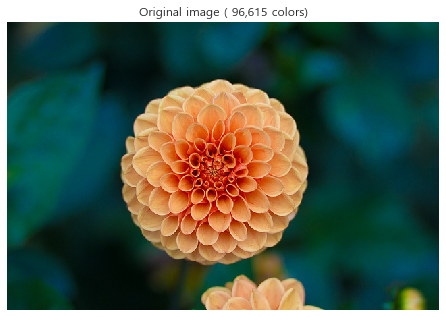

In [187]:
plt.figure(1)
plt.clf()
ax= plt.axes([0,0,1,1])
plt.axis('off')
plt.title('Original image ( 96,615 colors)')
plt.imshow(china)

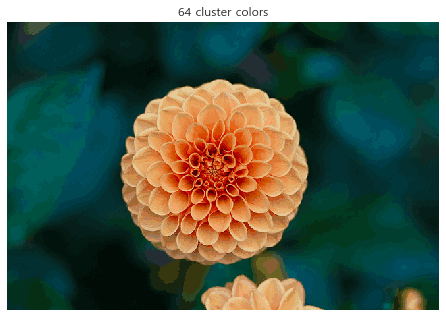

In [189]:
plt.figure(2)
plt.clf()
ax= plt.axes([0,0,1,1])
plt.axis('off')
plt.title('64 cluster colors')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

# 원하는 이미지 압축 추출해내기

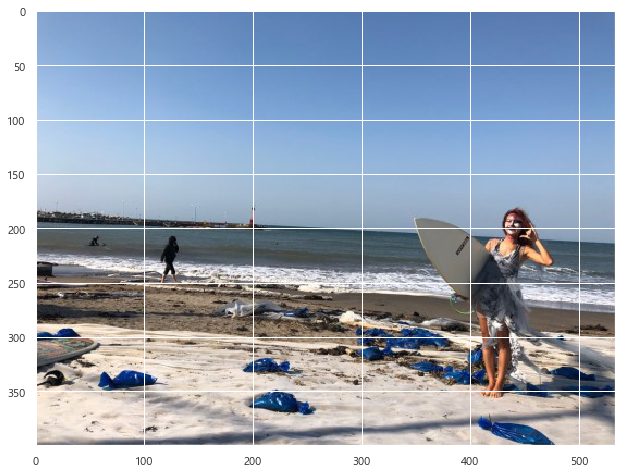

In [195]:
image = plt.imread('surf.jpg')
plt.figure(figsize=(15,8))
plt.imshow(image)

In [196]:
image.shape

(400, 533, 3)

In [197]:
# 바이트 수
image.shape[0] * image.shape[1] * image.shape[2]

639600

In [199]:
x, y, z = image.shape
image = np.array(image, dtype=np.float64)/ 255
image_2d = image.reshape(x*y, z) # 3차원을 이해하지 못하므로 2차원에서 중심값
image_2d.shape

(213200, 3)

In [230]:
kmeans_myimage = cluster.KMeans(n_clusters=100) # 16 압축 훈련데이터 세트

kmeans_myimage.fit(image_2d) # 16개 군집화 모델에 fit
cluster_centers = kmeans_myimage.cluster_centers_
cluster_centers

array([[0.00298268, 0.00282906, 0.00271764],
       [0.00115568, 0.0012344 , 0.00129873],
       [0.00167261, 0.0022685 , 0.00305081],
       [0.00230212, 0.0027966 , 0.00334581],
       [0.00335988, 0.00317962, 0.00304292],
       [0.00223833, 0.00196294, 0.00170436],
       [0.00011988, 0.00046193, 0.00105226],
       [0.0026202 , 0.00307641, 0.00355842],
       [0.00205544, 0.00262877, 0.00332534],
       [0.0037278 , 0.00346316, 0.00317674],
       [0.00193   , 0.00167055, 0.00142708],
       [0.0007708 , 0.0005689 , 0.00047115],
       [0.0014352 , 0.00199409, 0.00280857],
       [0.00114788, 0.00136323, 0.00152715],
       [0.00256983, 0.002461  , 0.00240888],
       [0.00042107, 0.00092385, 0.00166278],
       [0.00215263, 0.00247471, 0.00280961],
       [0.00179688, 0.00172166, 0.0016573 ],
       [0.00382849, 0.00361456, 0.00340319],
       [0.00067358, 0.00071538, 0.00082624],
       [0.0019615 , 0.00204291, 0.0022242 ],
       [0.00054401, 0.00035668, 0.00027511],
       [0.

In [228]:
print(len(cluster_centers)) # 16 군집
print(cluster_centers.shape)

cluster_labels = kmeans_myimage.labels_ 
# 종속변수 값 image.shape[0] * image.shape[1]나오고
cluster_labels

35
(35, 3)


array([22, 22, 22, ..., 34, 34, 34])

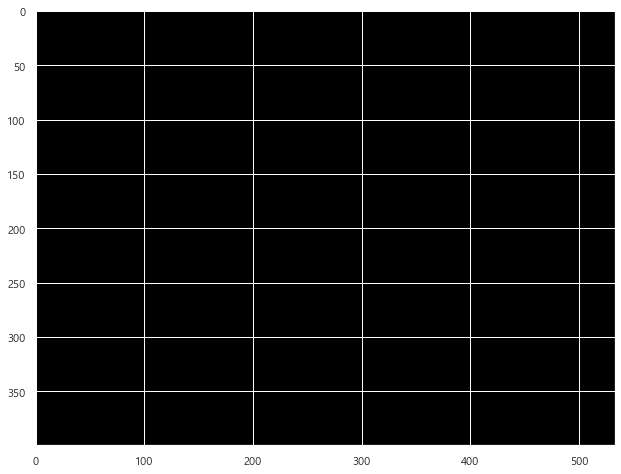

In [229]:
plt.figure(figsize=(15,8))
plt.imshow(cluster_centers[cluster_labels].reshape(x,y,z))
#           codebook

 # 원형 이상치 제거

In [299]:
from sklearn.datasets import make_blobs
X, label = make_blobs( 100, centers= 1 ) # 중심이 하나인 100r개를 만듦
kmeans = KMeans(n_clusters=1) # 군집 1개

# 군집화 알고리즘에  X 데이터 실행
kmeans.fit(X)

# 각 데이터의 중심으로 부터의 거리값으로 변환
distances = kmeans.transform(X)

sorted_idx = np.argsort(distances.ravel())[::-1][:5] # ravel()1차원으로 평평하게 맞춰짐
# argsort: 인덱스를 sort 하라 => 어떤 값의 높은지 인덱스넘버로 정렬 
#                                         -1 : 내림차순 그중에 5개

# 값을 기준으로 다른 변수를 컨트롤 하고 싶을데 = > 인덱스솔트를 이용함

sorted_idx

array([21, 93, 64, 97, 50], dtype=int64)

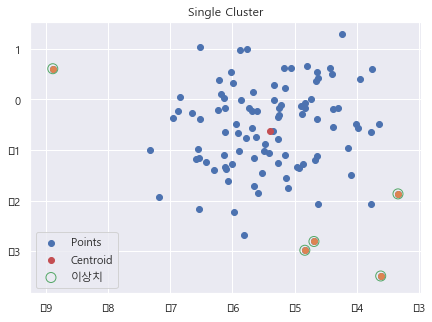

In [309]:
f, ax = plt.subplots(figsize=(7,5))
ax.set_title('Single Cluster')
ax.scatter(X[:, 0], X[:, 1], label='Points')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
          label='Centroid', color='r') # 중심점

ax.scatter(X[sorted_idx][:, 0], X[sorted_idx][:, 1])
ax.scatter(X[sorted_idx][:, 0], X[sorted_idx][:, 1], label='이상치', edgecolors='g',
          facecolors='none', s=100)

ax.legend( loc='best')

In [ ]:
# 주성분분석 = 모델 입력 전단에서 특징 추출 (noise 제거)


In [311]:
import numpy as np
from sklearn.decomposition import PCA                 # 관측수, 변수
X = np.array([[-1,-1],[-2,-1],[-3,-2],[1,1],[2,1],[3,2]]) # 6 x 2
print(X)

print()
pca = PCA(n_components=2) # 주성분=2개 =>변수 모두 주성분
pca.fit(X)
print(pca.explained_variance_ratio_) # 설명력 : 어떤 변수가 주성분인지 영향력이 높은지 확인 (0~1사이값)

print(pca.explained_variance_) # 분산이 큰 값이 주성분

[[-1 -1]
 [-2 -1]
 [-3 -2]
 [ 1  1]
 [ 2  1]
 [ 3  2]]

[0.99244289 0.00755711]
[7.93954312 0.06045688]


In [312]:
# 차원축소후에 분석을 하면 좋은점
- noise 제거
- 속도 개선
- 차원의 저주 : 너무 복잡한 변수가 많아서 = 복잡한 문제를 해결할수 있다.

SyntaxError: invalid syntax (<ipython-input-312-54cb1e157bb9>, line 2)

In [313]:

# 고유값분해로 인해 , 고유값과 고유벡터 생성= 모든데이터들이 결합을 해서 만들어진 변수값)
# 고유벡터로 인해 새로운 축이 만들어짐 => 변수명도 만들어줘야함 
# 축이름 재명령 => 재해석해야함

# PCA의 결과를 모델의 변수로 추가하면 정확도가 상승한다.



SVD : 특이값 분해 => 희소행렬: 특징(즉, 특이값) 추출.
    희소행렬 분해 : 특징 추출 (차원축소: 두변수 합쳐서 1개변수 = 내적) 
        
        => (특이행렬 분석)
        - 희소행렬 ( 대각선 0이 많은 행렬)

SyntaxError: invalid syntax (<ipython-input-313-bfbe2e66bcf6>, line 9)

In [314]:
# svd = 희소행렬의 특징추출할때 사용. => 비정방행렬인 경우 사용

pca = PCA(n_components=2, svd_solver='full') # singular value decomposition => 0이 많이 나옴
# svd_solver='full' 데이터 전부 넣어서 고려하겠다
#           'randomize' = 500x500 이상: 데이터가 너무 크면 랜덤으로 고려
#           'arpack' = 0이 많은걸 압축해서 출력해줘라
pca.fit(X)
print(pca.explained_variance_ratio_)

[0.99244289 0.00755711]


In [315]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
print(cancer.feature_names)
print(type(cancer))
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state=1)

print(type(X_train))
print(X_train.shape)
print(X_train.dtype)
print(X_test.shape)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
<class 'sklearn.utils.Bunch'>
<class 'numpy.ndarray'>
(426, 30)
float64
(143, 30)


In [249]:
from sklearn.svm import SVC
svm = SVC(C=100)                # 규제값  어떻게 정의하지
svm.fit(X_train, y_train)
print("테스트 세트 정확도: {:2f}".format(svm.score(X_test, y_test)))

테스트 세트 정확도: 0.615385


C:\Users\ICT01_02\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [252]:
# PCA 는 스케일링에 많이 영향받음

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [254]:
svm.fit(X_train_scaled, y_train)
print("스케일 조정된 테스트 세트 정확도: {:2f}".format(svm.score(X_test_scaled, y_test)))

스케일 조정된 테스트 세트 정확도: 0.965035


C:\Users\ICT01_02\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[0.44272026 0.18971182]

원본 데이터 형태: (569, 30)
축소된 데이터 형태: (569, 2)


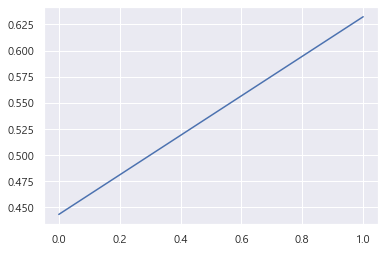

In [266]:
from sklearn.preprocessing import StandardScaler

cancer = load_breast_cancer()
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

pca = PCA(n_components=2)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)
print(pca.explained_variance_ratio_) # 2개의 주성분중 분산이 큰 
print()
print("원본 데이터 형태: {}".format(str(X_scaled.shape))) # 28개의 특성 제거됨
print("축소된 데이터 형태: {}".format(str(X_pca.shape))) # 특성을 2개로 추출
plt.plot(np.cumsum(pca.explained_variance_ratio_))

[4.42720256e-01 1.89711820e-01 9.39316326e-02 6.60213492e-02
 5.49576849e-02 4.02452204e-02 2.25073371e-02 1.58872380e-02
 1.38964937e-02 1.16897819e-02 9.79718988e-03 8.70537901e-03
 8.04524987e-03 5.23365745e-03 3.13783217e-03 2.66209337e-03
 1.97996793e-03 1.75395945e-03 1.64925306e-03 1.03864675e-03
 9.99096464e-04 9.14646751e-04 8.11361259e-04 6.01833567e-04
 5.16042379e-04 2.72587995e-04 2.30015463e-04 5.29779290e-05
 2.49601032e-05 4.43482743e-06]

원본 데이터 형태: (569, 30)


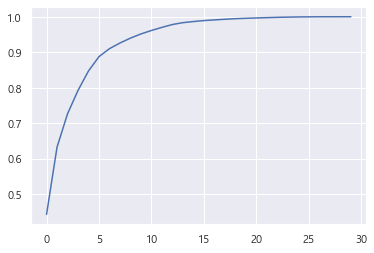

In [271]:

pca = PCA(n_components=30)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)
print(pca.explained_variance_ratio_) # 2개의 주성분중 분산이 큰 
print()
print("원본 데이터 형태: {}".format(str(X_scaled.shape))) 
# 30개의 특성으로 바꿔서 그래프 그리기
plt.plot(np.cumsum(pca.explained_variance_ratio_)) # elbow 를 시각적으로 확인

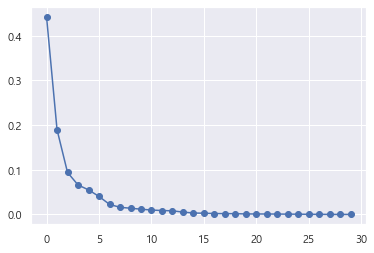

In [270]:
plt.plot(pca.explained_variance_ratio_, 'bo-')

SVM 테스트 세트 정확도: 0.923077


C:\Users\ICT01_02\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


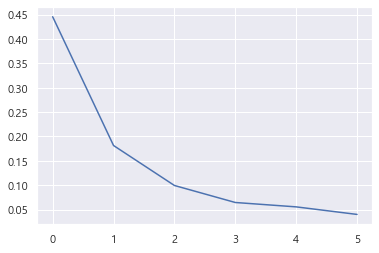

In [276]:
# z점수 정규화 스케일로 확인해보자

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.decomposition import PCA
pca = PCA(n_components =6 ) # 전체변수는 30개 => 변수 6개 주성분 추출
pca.fit(X_train_scaled)
X_t_train = pca.transform(X_train_scaled)
X_t_test = pca.transform(X_test_scaled)
svm.fit(X_t_train, y_train)
print("SVM 테스트 세트 정확도: {:2f}".format(svm.score(X_t_test, y_test)))
plt.plot(pca.explained_variance_ratio_)

SVM 테스트 세트 정확도: 0.944056


C:\Users\ICT01_02\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


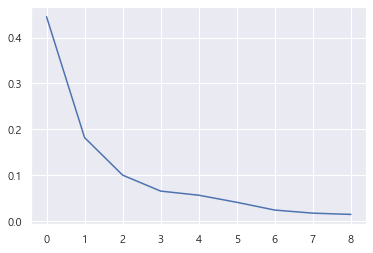

In [277]:
pca = PCA(n_components =9 ) # 전체변수는 30개 => 변수 6개 주성분 추출
pca.fit(X_train_scaled)
X_t_train = pca.transform(X_train_scaled)
X_t_test = pca.transform(X_test_scaled)
svm.fit(X_t_train, y_train)
print("SVM 테스트 세트 정확도: {:2f}".format(svm.score(X_t_test, y_test)))
plt.plot(pca.explained_variance_ratio_)


# 변수 9개 일때 94%

SVM 테스트 세트 정확도: 0.937063


C:\Users\ICT01_02\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


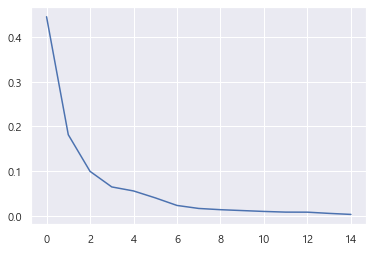

In [279]:
pca = PCA(n_components =15 ) # 전체변수는 30개 => 변수 6개 주성분 추출
pca.fit(X_train_scaled)
X_t_train = pca.transform(X_train_scaled)
X_t_test = pca.transform(X_test_scaled)
svm.fit(X_t_train, y_train)
print("SVM 테스트 세트 정확도: {:2f}".format(svm.score(X_t_test, y_test)))
plt.plot(pca.explained_variance_ratio_)

# 15개까지도 94% 라서 ~ 9개 주성분으로 분석해도 충분함
# 많은 변수를 써서 97% 까지 올려주더라도 신뢰성이 떨어짐

SVM 테스트 세트 정확도: 0.951049


C:\Users\ICT01_02\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


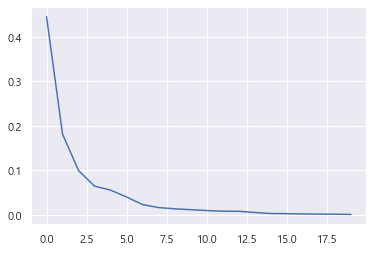

In [280]:
pca = PCA(n_components =20 ) # 전체변수는 30개 => 변수 6개 주성분 추출
pca.fit(X_train_scaled)
X_t_train = pca.transform(X_train_scaled)
X_t_test = pca.transform(X_test_scaled)
svm.fit(X_t_train, y_train)
print("SVM 테스트 세트 정확도: {:2f}".format(svm.score(X_t_test, y_test)))
plt.plot(pca.explained_variance_ratio_)

SVM 테스트 세트 정확도: 0.965035


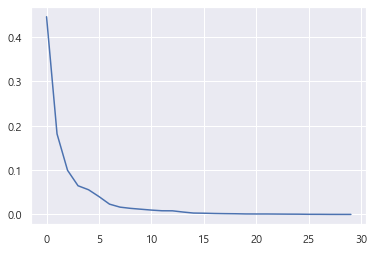

In [281]:
pca = PCA(n_components =30 ) # 전체변수는 30개 => 변수 6개 주성분 추출
pca.fit(X_train_scaled)
X_t_train = pca.transform(X_train_scaled)
X_t_test = pca.transform(X_test_scaled)
svm.fit(X_t_train, y_train)
print("SVM 테스트 세트 정확도: {:2f}".format(svm.score(X_t_test, y_test)))
plt.plot(pca.explained_variance_ratio_)

C:\Users\ICT01_02\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM 테스트 세트 정확도: 0.923077
PCA 주성분 형태: (6, 30)
 PCA 주성분: [[ 2.27727952e-01  1.15125429e-01  2.34880866e-01  2.29368295e-01
   1.34257906e-01  2.37160022e-01  2.57472643e-01  2.60831732e-01
   1.28883480e-01  4.44771262e-02  2.05926703e-01  1.45035459e-02
   2.10480600e-01  2.02438009e-01  1.01867571e-02  1.64939913e-01
   1.53175867e-01  1.78415012e-01  2.46122358e-02  9.25782919e-02
   2.32908159e-01  1.12324737e-01  2.40809688e-01  2.29457569e-01
   1.22454525e-01  2.08303026e-01  2.29910791e-01  2.49291962e-01
   1.15240250e-01  1.26763277e-01]
 [-2.15362267e-01 -6.01602111e-02 -1.97386080e-01 -2.12242935e-01
   1.93714685e-01  1.61665826e-01  6.56584195e-02 -2.40618685e-02
   1.88332406e-01  3.77871193e-01 -9.33235914e-02  1.04195564e-01
  -8.12542149e-02 -1.40402031e-01  2.19281447e-01  2.51896246e-01
   2.15694850e-01  1.53310362e-01  1.93854431e-01  3.02040600e-01
  -2.10358120e-01 -5.51038409e-02 -1.91044086e-01 -2.09342024e-01
   1.56961739e-01  1.32043594e-01  8.62556801e-02 -1

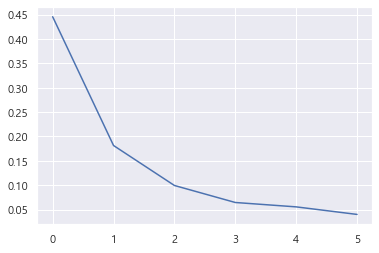

In [284]:

from sklearn.decomposition import PCA
pca = PCA(n_components =6 ) # 전체변수는 30개 => 변수 6개 주성분 추출
pca.fit(X_train_scaled)
X_t_train = pca.transform(X_train_scaled)
X_t_test = pca.transform(X_test_scaled)
svm.fit(X_t_train, y_train)
print("SVM 테스트 세트 정확도: {:2f}".format(svm.score(X_t_test, y_test)))
plt.plot(pca.explained_variance_ratio_)
print("PCA 주성분 형태: {}".format(pca.components_.shape)) # 주성분을 30개의 변수가 설명하고 있다는 뜻 
                                                           #    -> 주성분 축이 새로 만들어짐

# 변수의 기여도를 보고 명명식
print(" PCA 주성분: {}".format(pca.components_))

C:\Users\ICT01_02\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_02\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


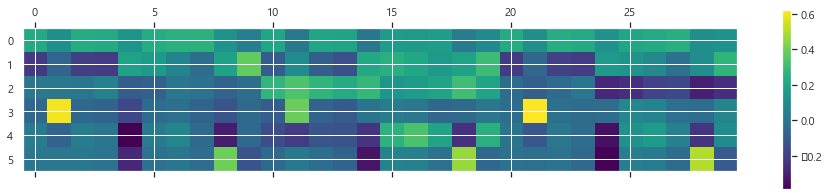

In [285]:
plt.matshow(pca.components_, cmap='viridis')
plt.colorbar()